### Libraries

In [471]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pathlib


Esto para evitar los warnings y para que el dataset te muestre todas las columnas

In [472]:
import warnings 
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
pd.options.display.max_columns=None

### Data

Concatenamos en las filas ya que es la continuación

In [473]:
train = pd.read_csv(r'data\test.csv')   
test = pd.read_csv(r'data\train.csv')
df = pd.concat([test,train], axis=0).reset_index(drop=True)

In [474]:
df.shape

(2919, 81)

In [475]:
df.duplicated().sum()

0

### Tratamiento

Cambiamos el indice

In [476]:
df = df.drop('Id', axis=1)

In [477]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,

<Axes: >

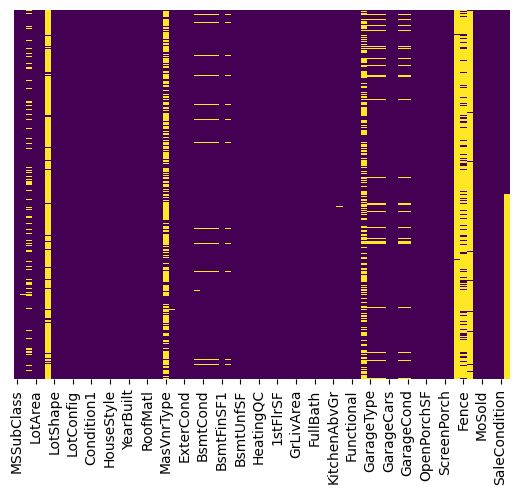

In [478]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Buscar el porcentaje de valores nulos por columna

In [479]:
missing_data = pd.isnull(test).sum()
missing_data_percentage = missing_data/len(test)*100 #Calculamos el % del los datos faltantes en cada columna
nulos_totales= missing_data_percentage.sort_values(ascending = False) #Ordenamos de mayor a menor
nulos_totales = pd.DataFrame(nulos_totales,columns=["% nulos"])
nulos_totales.T

,PoolQC,MiscFeature,Alley,Fence,MasVnrType,FireplaceQu,LotFrontage,GarageYrBlt,GarageCond,GarageType,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,MasVnrArea,Electrical,Id,Functional,Fireplaces,KitchenQual,KitchenAbvGr,BedroomAbvGr,HalfBath,FullBath,BsmtHalfBath,TotRmsAbvGrd,GarageCars,GrLivArea,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,BsmtFullBath,HeatingQC,LowQualFinSF,LandSlope,OverallQual,HouseStyle,BldgType,Condition2,Condition1,Neighborhood,LotConfig,YearBuilt,Utilities,LandContour,LotShape,Street,LotArea,MSZoning,OverallCond,YearRemodAdd,2ndFlrSF,BsmtFinSF2,1stFlrSF,CentralAir,MSSubClass,Heating,TotalBsmtSF,BsmtUnfSF,BsmtFinSF1,RoofStyle,Foundation,ExterCond,ExterQual,Exterior2nd,Exterior1st,RoofMatl,SalePrice
% nulos,99.520548,96.30137,93.767123,80.753425,59.726027,47.260274,17.739726,5.547945,5.547945,5.547945,5.547945,5.547945,2.60274,2.60274,2.534247,2.534247,2.534247,0.547945,0.068493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [480]:
missing_data = pd.isnull(train).sum()
missing_data_percentage = missing_data/len(train)*100 #Calculamos el % del los datos faltantes en cada columna
nulos_totales= missing_data_percentage.sort_values(ascending = False) #Ordenamos de mayor a menor
nulos_totales = pd.DataFrame(nulos_totales,columns=["% nulos"])
nulos_totales.T

,PoolQC,MiscFeature,Alley,Fence,MasVnrType,FireplaceQu,LotFrontage,GarageYrBlt,GarageQual,GarageFinish,GarageCond,GarageType,BsmtCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,MasVnrArea,MSZoning,BsmtHalfBath,Utilities,Functional,BsmtFullBath,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,KitchenQual,TotalBsmtSF,Exterior2nd,GarageCars,Exterior1st,GarageArea,SaleType,MiscVal,BedroomAbvGr,KitchenAbvGr,YrSold,TotRmsAbvGrd,MoSold,Fireplaces,PoolArea,HalfBath,ScreenPorch,3SsnPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,PavedDrive,Id,HeatingQC,FullBath,GrLivArea,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,MSSubClass,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,SaleCondition
% nulos,99.79438,96.504455,92.66621,80.123372,61.274846,50.03427,15.558602,5.346127,5.346127,5.346127,5.346127,5.209047,3.084304,3.015764,3.015764,2.878684,2.878684,1.028101,0.27416,0.13708,0.13708,0.13708,0.13708,0.06854,0.06854,0.06854,0.06854,0.06854,0.06854,0.06854,0.06854,0.06854,0.06854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [481]:
missing_data = pd.isnull(df).sum()
missing_data_percentage = missing_data/len(df)*100 #Calculamos el % del los datos faltantes en cada columna
nulos_totales= missing_data_percentage.sort_values(ascending = False) #Ordenamos de mayor a menor
nulos_totales = pd.DataFrame(nulos_totales,columns=["% nulos"])
nulos_totales.T

,PoolQC,MiscFeature,Alley,Fence,MasVnrType,SalePrice,FireplaceQu,LotFrontage,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2,BsmtFinType1,MasVnrArea,MSZoning,BsmtHalfBath,Utilities,BsmtFullBath,Functional,Exterior2nd,Exterior1st,GarageArea,GarageCars,SaleType,KitchenQual,BsmtFinSF1,Electrical,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,TotRmsAbvGrd,Fireplaces,SaleCondition,PavedDrive,MoSold,YrSold,WoodDeckSF,MiscVal,PoolArea,ScreenPorch,3SsnPorch,BedroomAbvGr,EnclosedPorch,OpenPorchSF,KitchenAbvGr,MSSubClass,HalfBath,OverallCond,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,FullBath,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,CentralAir
% nulos,99.657417,96.402878,93.216855,80.438506,60.500171,49.982871,48.646797,16.649538,5.447071,5.447071,5.447071,5.447071,5.378554,2.809181,2.809181,2.774923,2.740665,2.706406,0.787941,0.137033,0.068517,0.068517,0.068517,0.068517,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.034258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Crear funcion que recorra el df y elimine todas las columnas que tengan grn parte de valores nulos menos la de SalesPrice.
Quizas hacer la funcion para que elimine todas las columnas que tengan mas de un 30% de nulos menos SalePrice

Primero buscamos las columnas a eliminar y luego las eliminamos


In [482]:
# primero establecemos el df y el porcentaje

def delete_null(df, threshold):
    columns_remove = [column for column in df.columns if (pd.isnull(df[column]).sum() / len(df)) * 100 > threshold and column != 'SalePrice']
    df = df.drop(columns=columns_remove)
    return df

In [483]:
df_copy = df

In [484]:
df = delete_null(df, 30)

<Axes: >

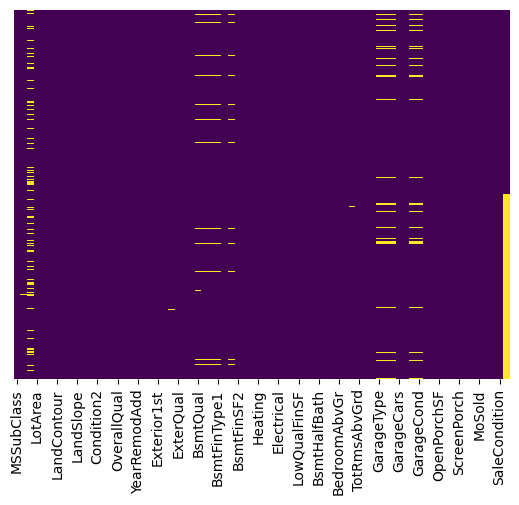

In [485]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [486]:
'''Solución demetrio:
# da primero a SalePrice valores de 0 para que no se tenga en cuenta en el drop
df['SalePrice']= df['SalePrice'].fillna(value=0)
# luego eliminamos las que mas tienen
def remove_null(df, thr_perc):
    threshold_na = len(df) * thr_perc 
    df = df.dropna(thresh=threshold_na, axis=1)
    return df
df = remove_null(df,0.8)'''

"Solución demetrio:\n# da primero a SalePrice valores de 0 para que no se tenga en cuenta en el drop\ndf['SalePrice']= df['SalePrice'].fillna(value=0)\n# luego eliminamos las que mas tienen\ndef remove_null(df, thr_perc):\n    threshold_na = len(df) * thr_perc \n    df = df.dropna(thresh=threshold_na, axis=1)\n    return df\ndf = remove_null(df,0.8)"

# Vamos a crear una función que según el caso, repare por la moda, media o mediana los valores faltantes

In [487]:
# le damos el valor 0 a los faltantes en SalePrice para tenerla controlada
df['SalePrice']= df['SalePrice'].fillna(value=0)

Creamos una función para ver la distribución de la columna y visualizarla en un box

In [488]:
def distr(column):
    fig = px.box(df, y=column)
    fig.show()
    return ('la moda es:',df[column].mode(),'la media es:',df[column].mean(), 'la mediana es:', df[column].median())
     

In [489]:
# Esta columna mejor con la media
distr('LotFrontage')

('la moda es:',
 0    60.0
 Name: LotFrontage, dtype: float64,
 'la media es:',
 69.30579531442663,
 'la mediana es:',
 68.0)

Columnas con valores nulos: LotFrontage	GarageCond	GarageYrBlt	GarageFinish	GarageQual	GarageType	BsmtExposure	BsmtCond	BsmtQual	BsmtFinType2	BsmtFinType1	MasVnrArea	MSZoning	BsmtFullBath	Functional	BsmtHalfBath	Utilities	BsmtFinSF1	BsmtUnfSF	TotalBsmtSF	SaleType	Electrical	KitchenQual	BsmtFinSF2	Exterior2nd	Exterior1st	GarageCars	GarageArea

In [490]:
def repair_nulls(df):
    for column in df:

        if df[column].dtype == object:
            df[column].fillna(df[column].mode()[0], inplace=True)

        if df[column].dtype == float:
            df[column].fillna(df[column].mean(), inplace=True)

        if df[column].dtype == int:
            df[column].fillna(df[column].median(), inplace=True)

    return df

In [491]:
repair_nulls(df)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.000000,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.000000,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.000000,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.000000,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.000000,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,Attchd,1978.113406,Unf,0.0,0.0,TA,TA,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,0.0
2915,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,CarPort,1970.000000,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml,0.0
2916,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,Detchd,1960.000000,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml,0.0
2917,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,Attchd,1978.113406,Unf,0.0,0.0,TA,TA,Y,80,32,0,0,0,0,700,7,2006,WD,Normal,0.0


In [492]:
df.isnull().sum().sum()

0

<Axes: >

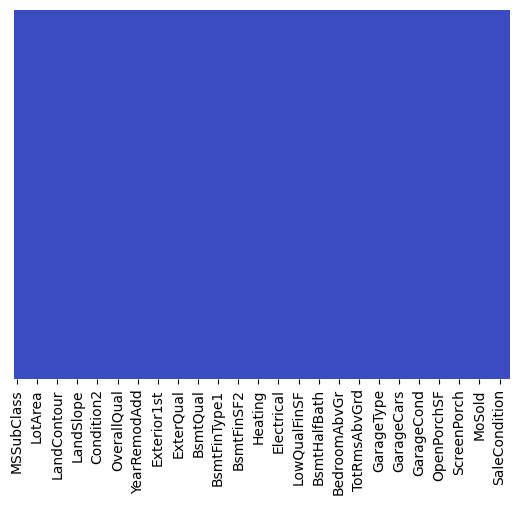

In [493]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

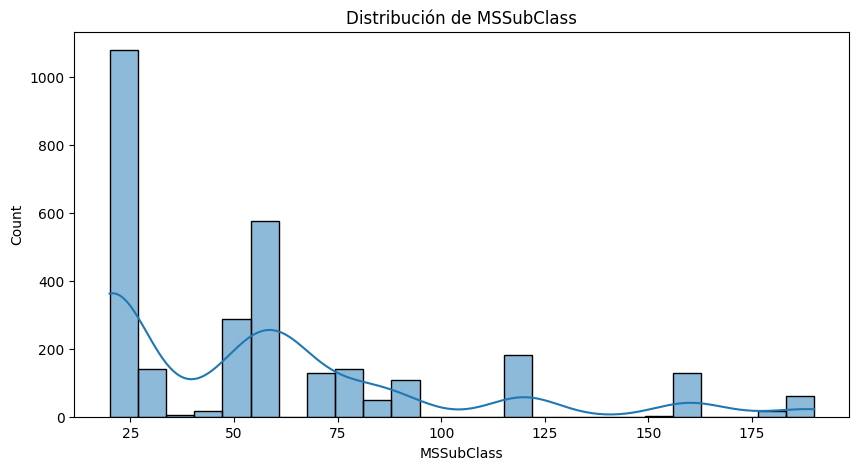

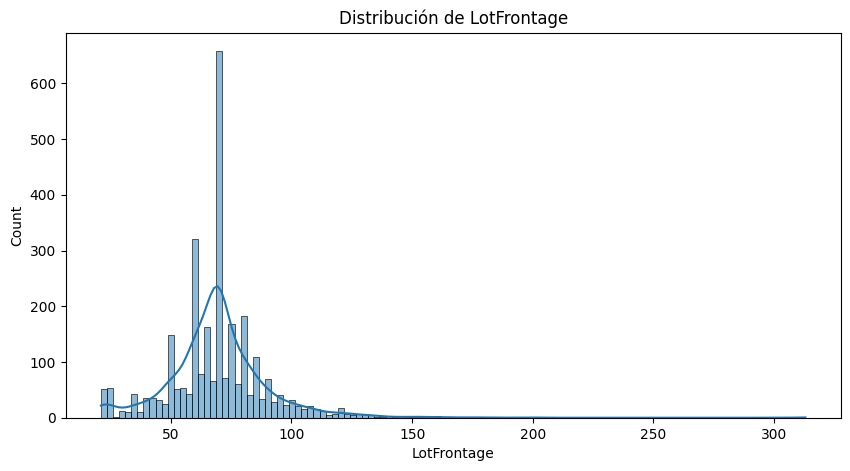

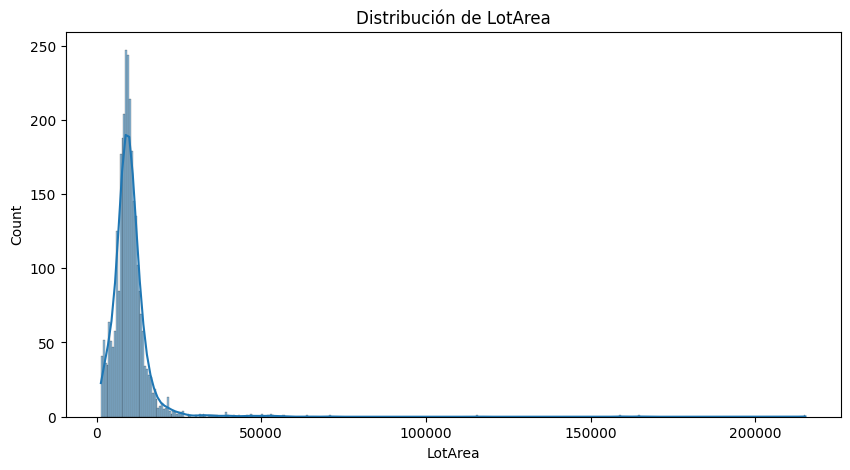

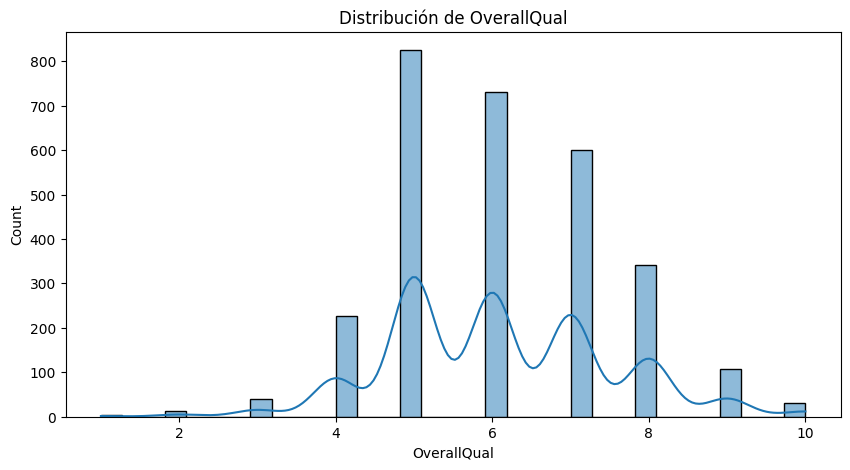

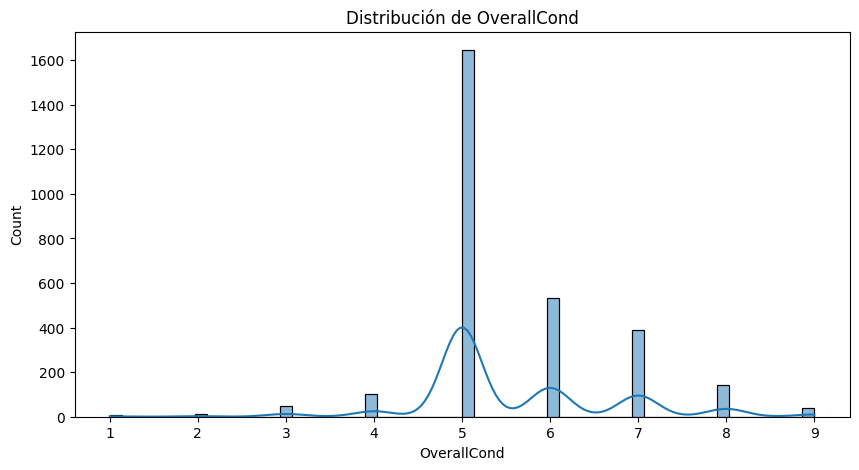

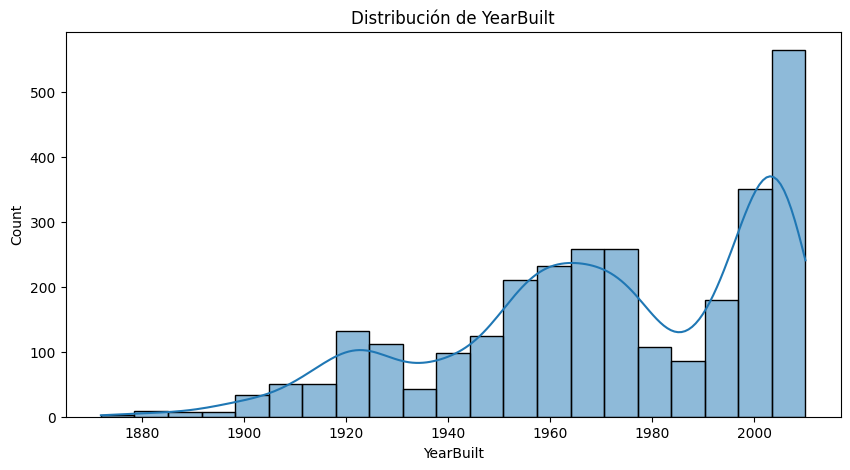

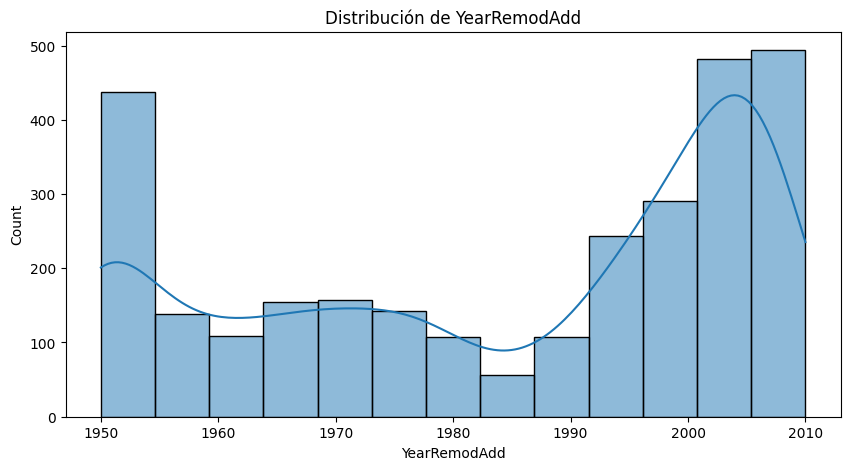

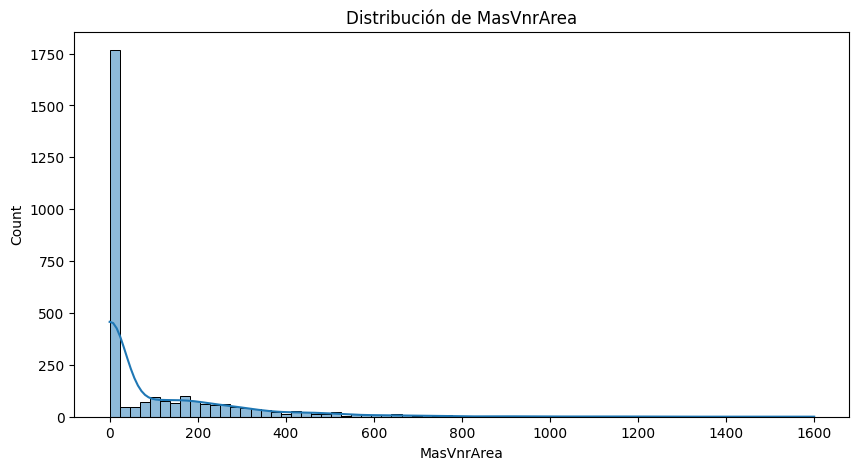

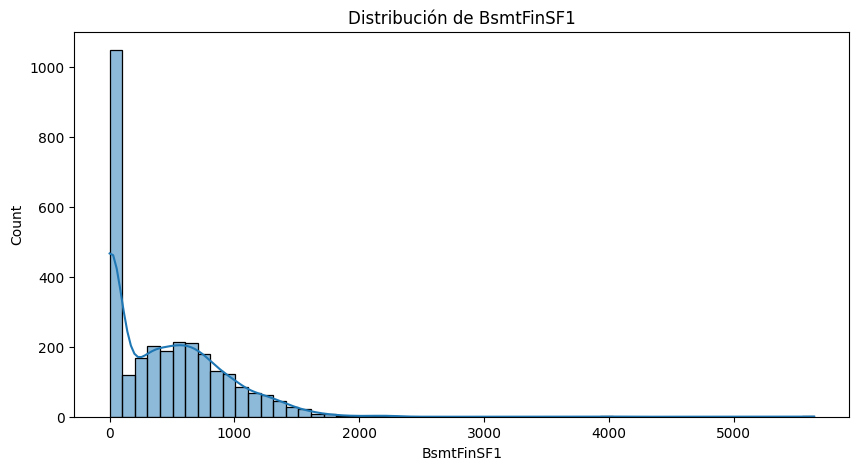

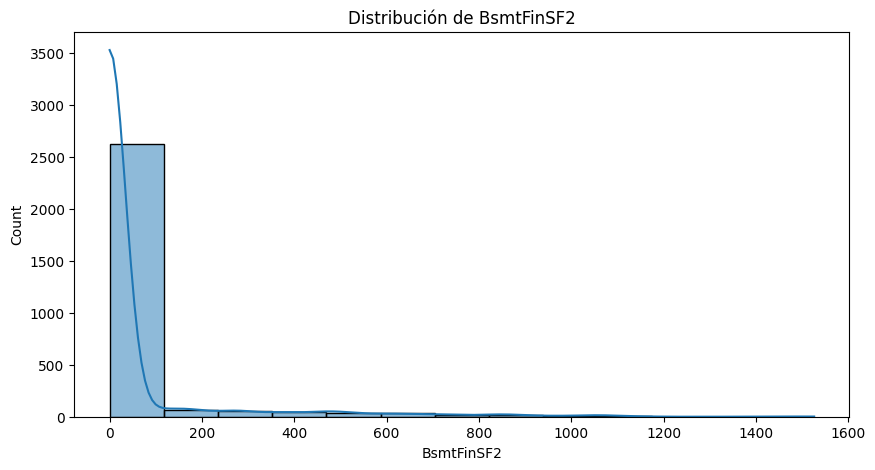

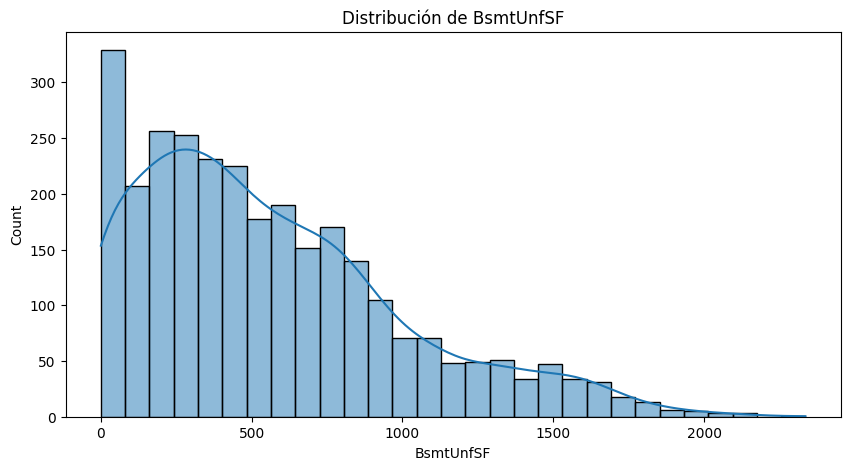

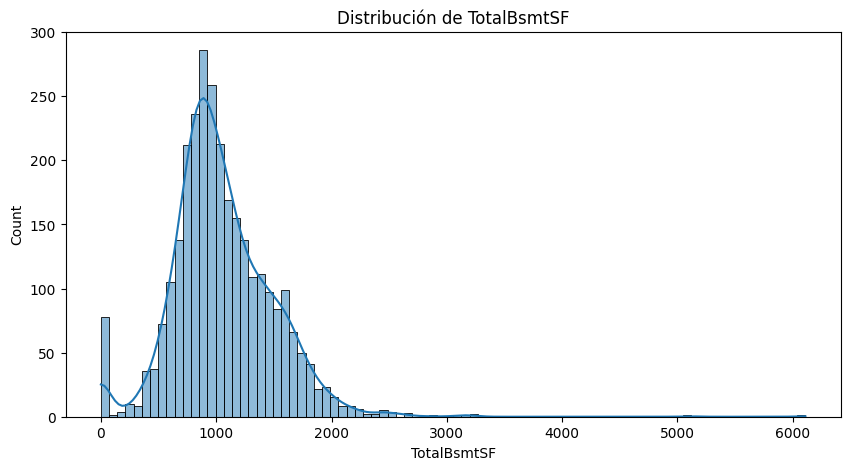

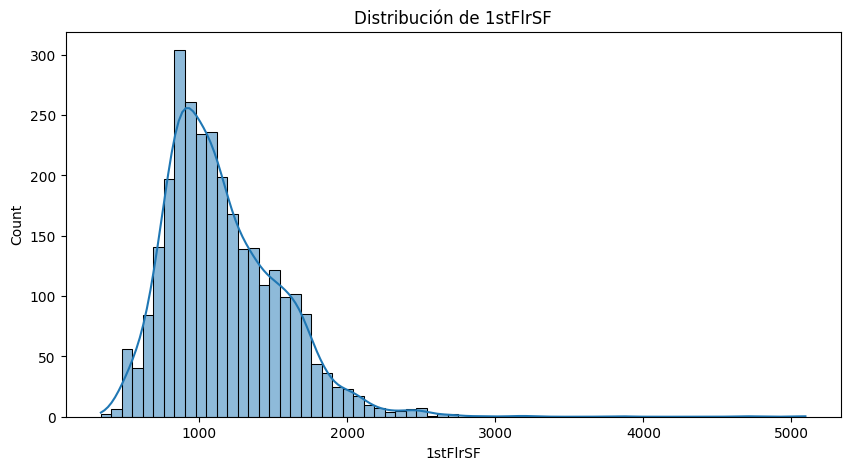

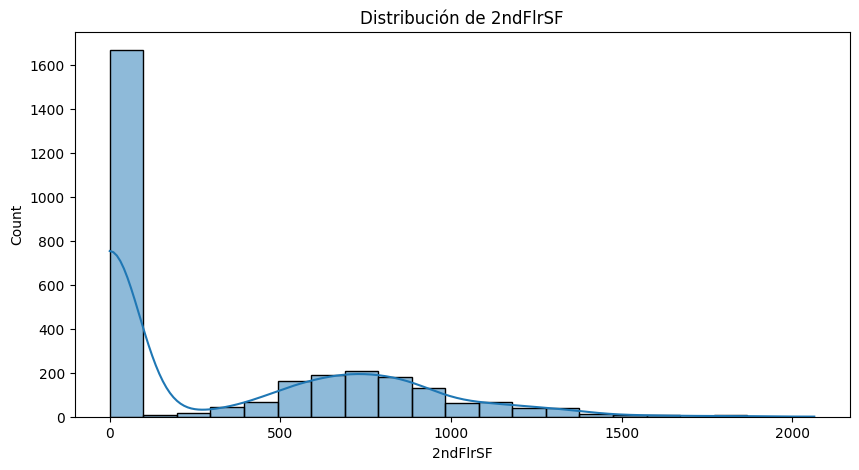

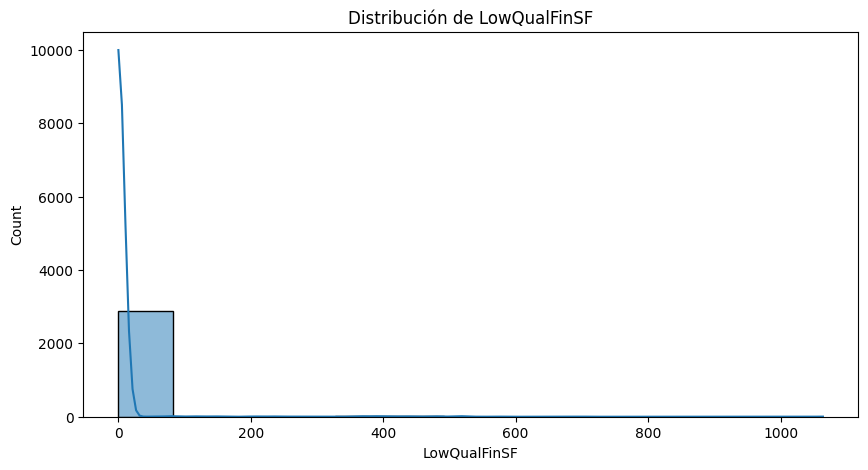

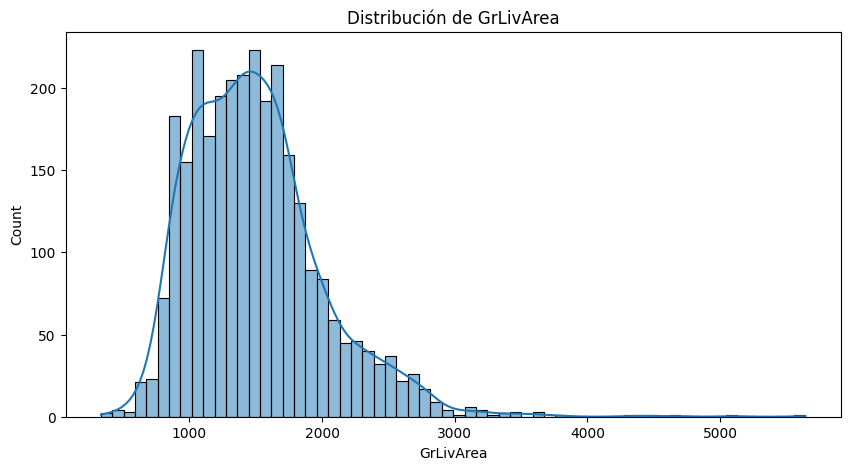

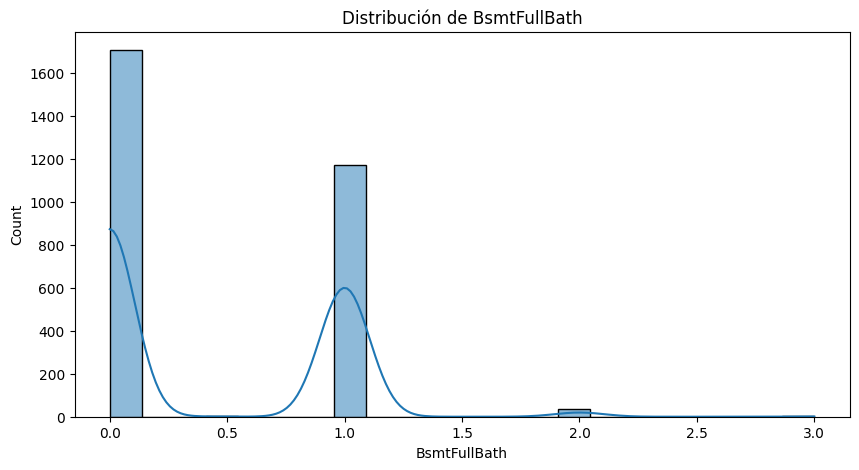

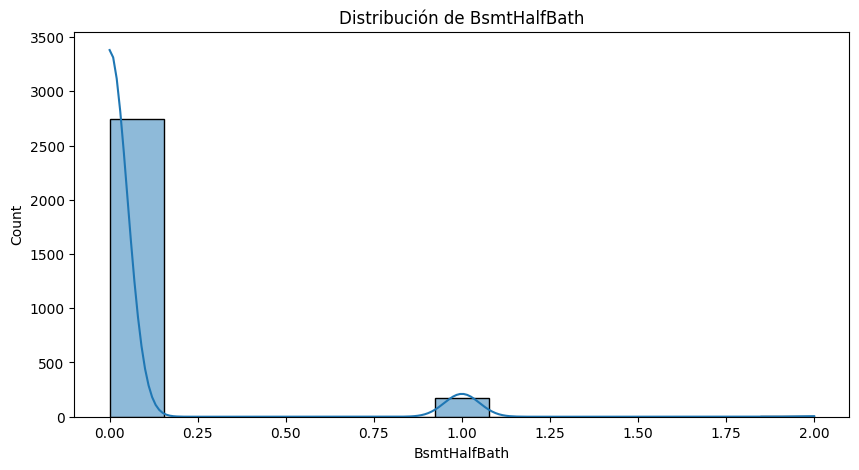

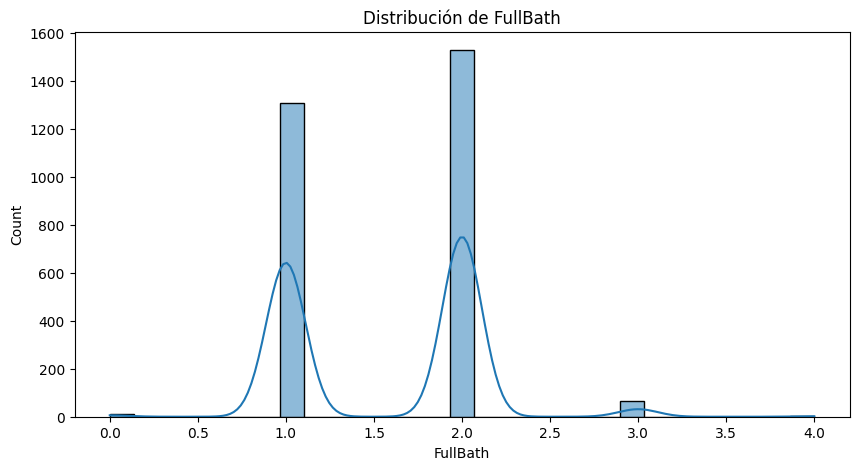

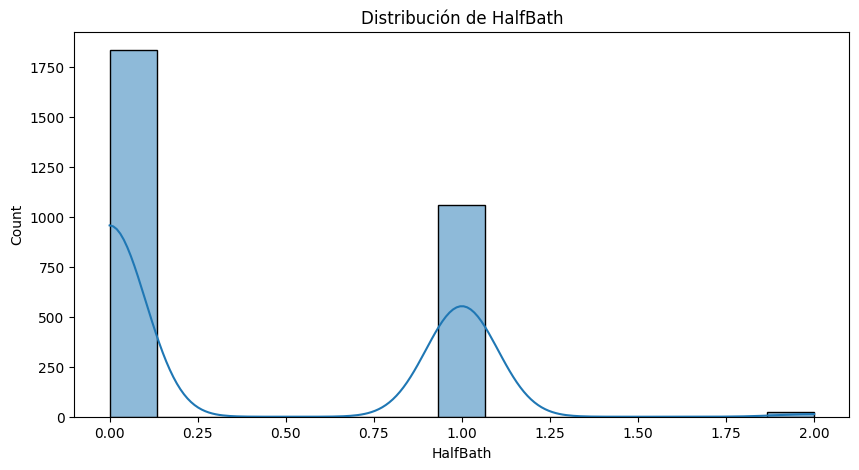

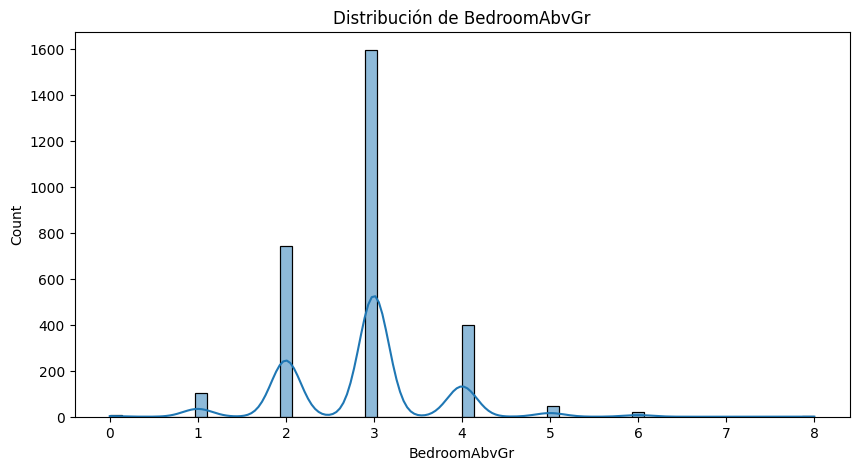

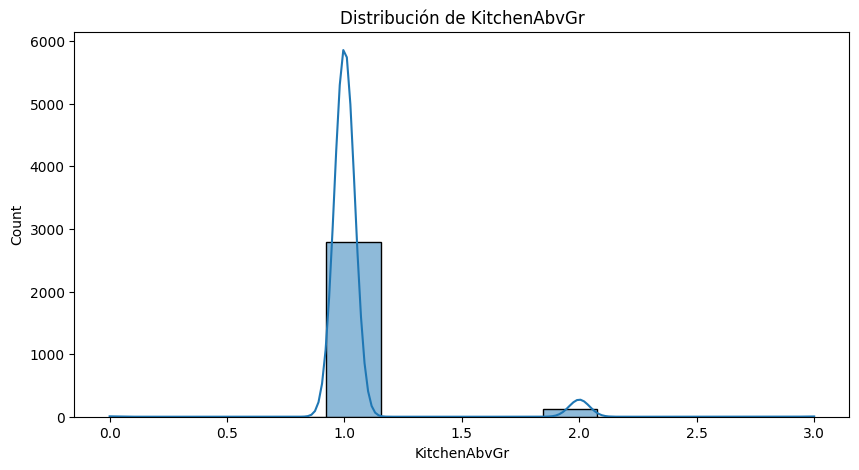

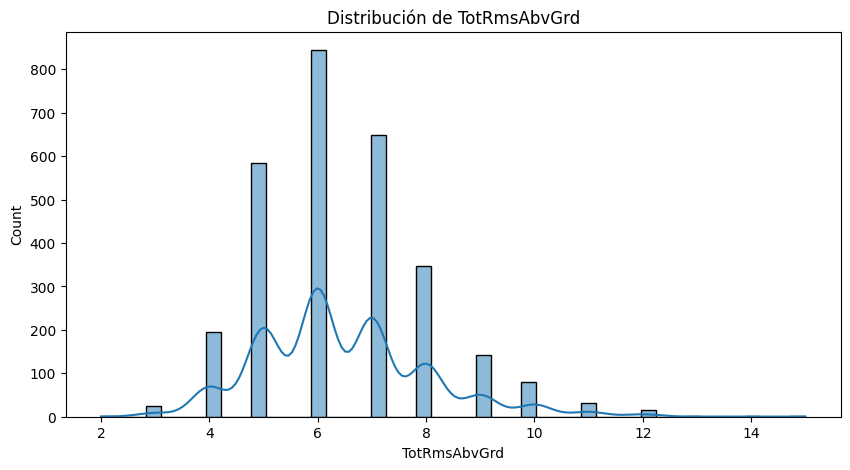

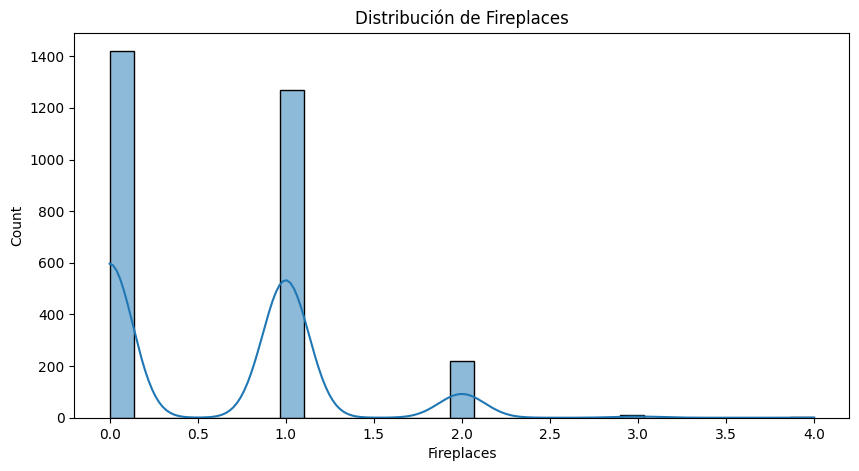

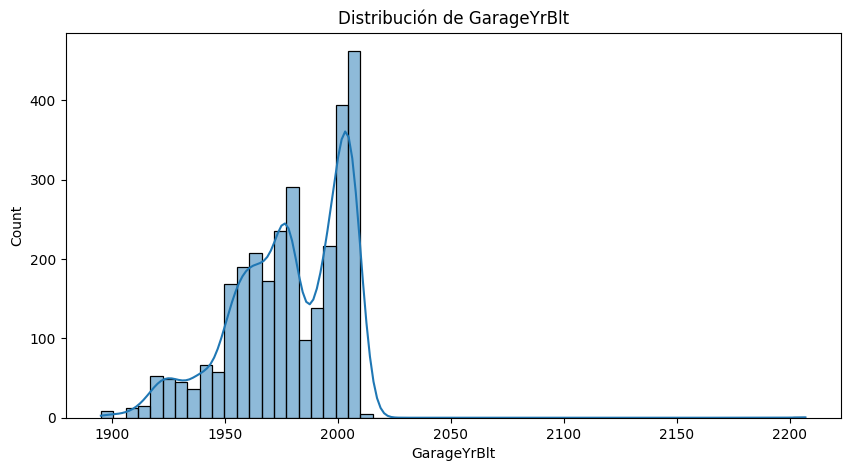

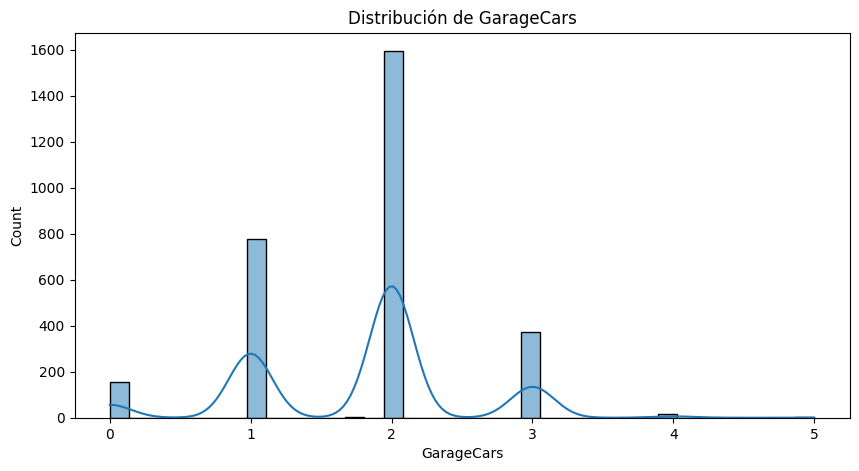

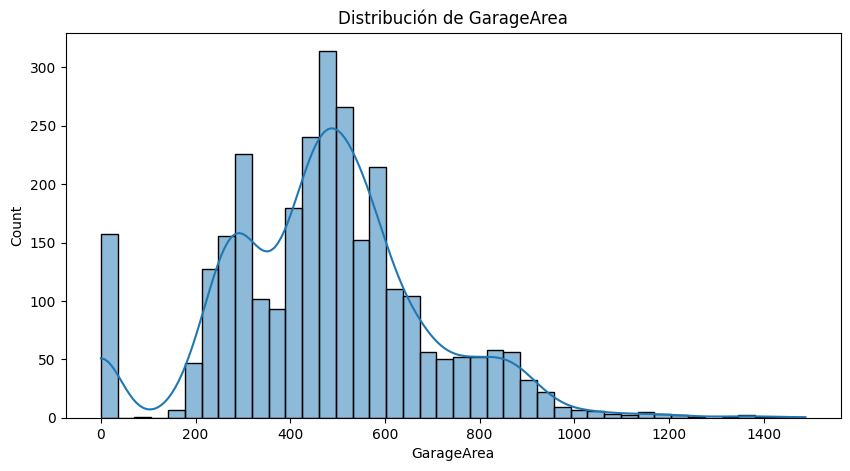

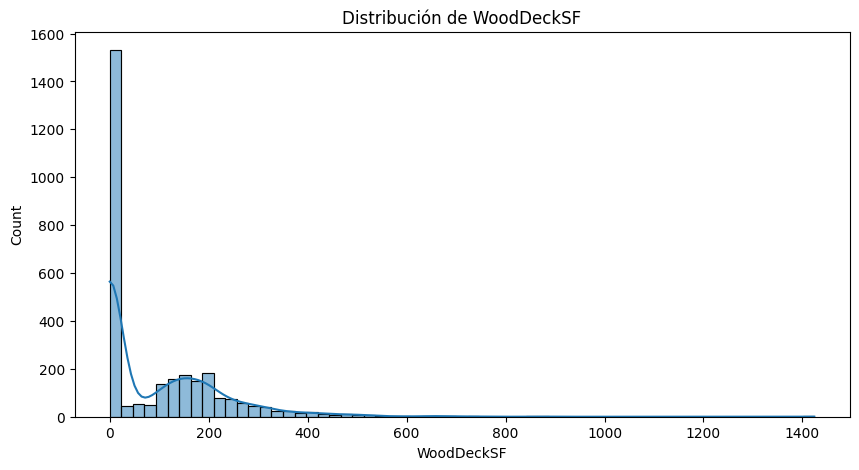

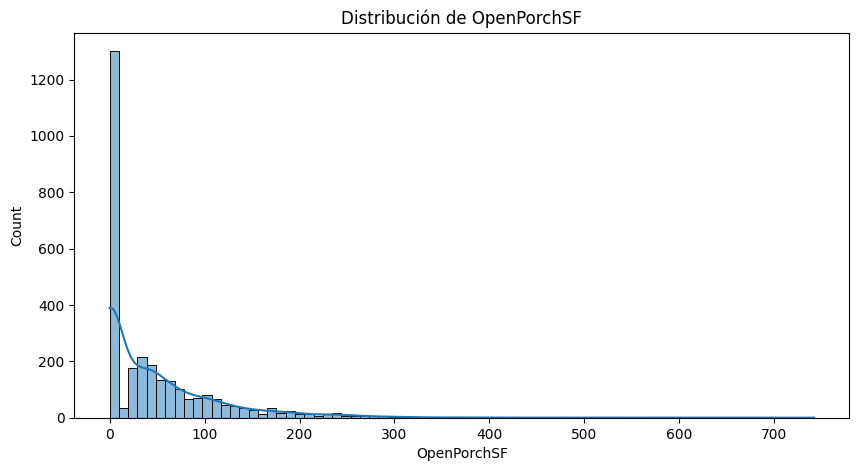

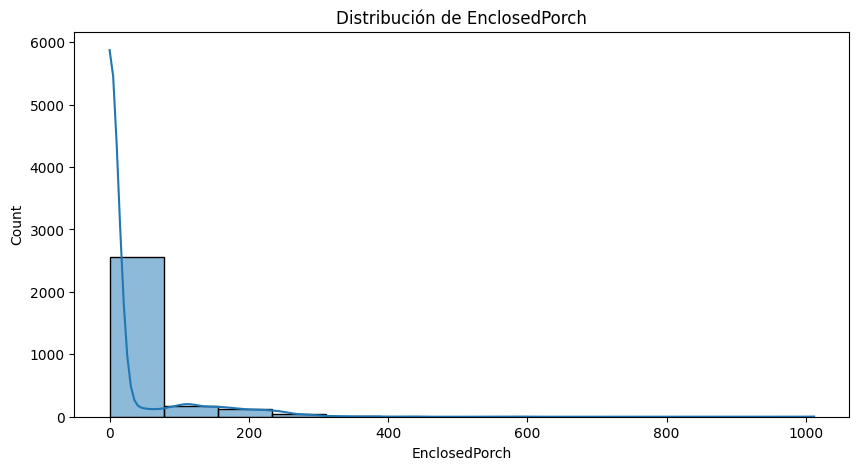

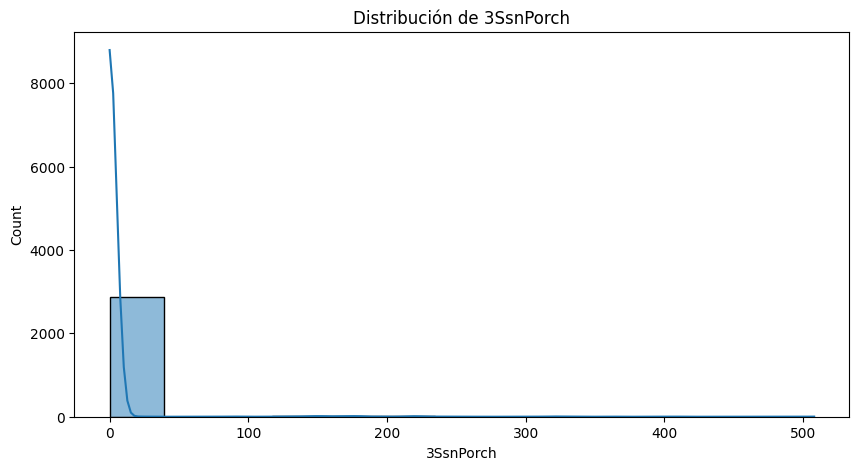

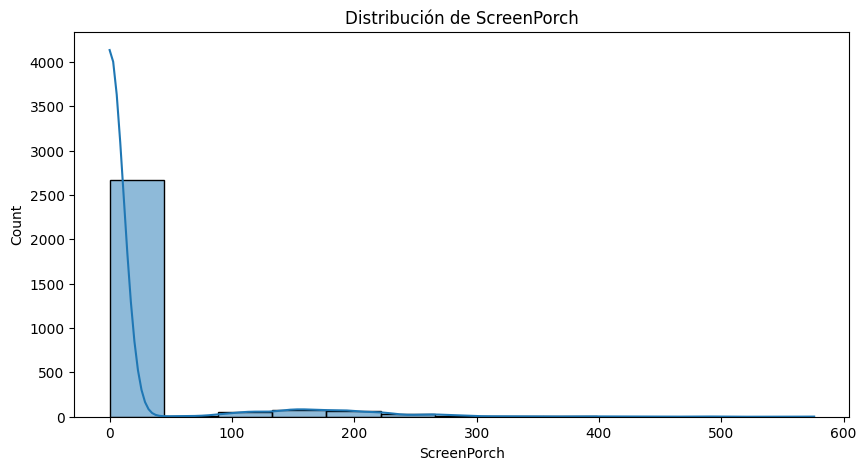

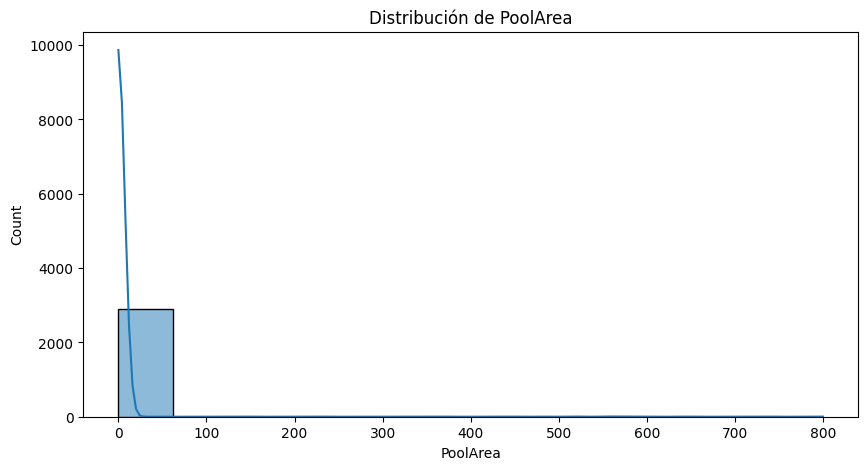

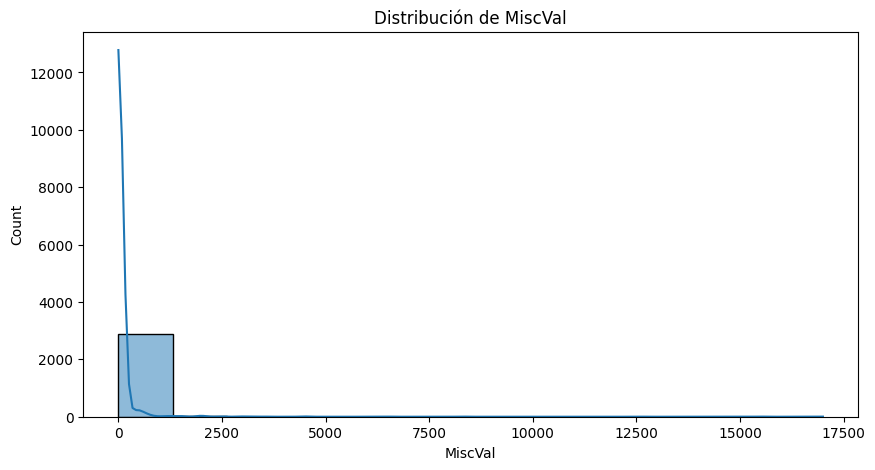

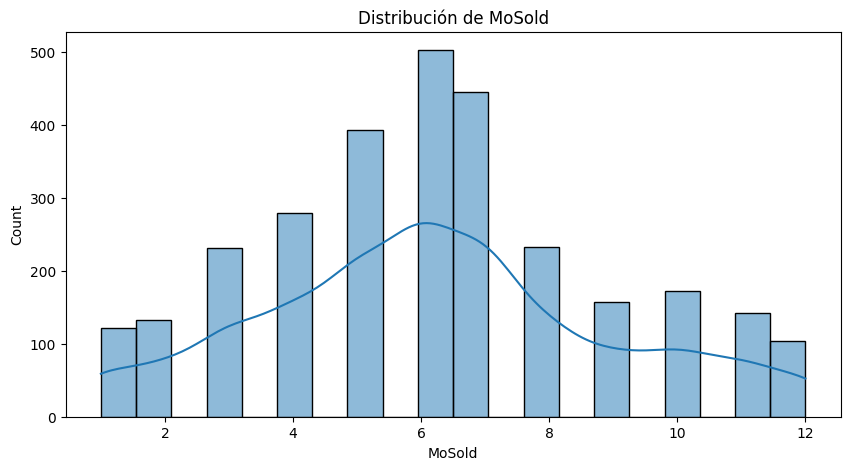

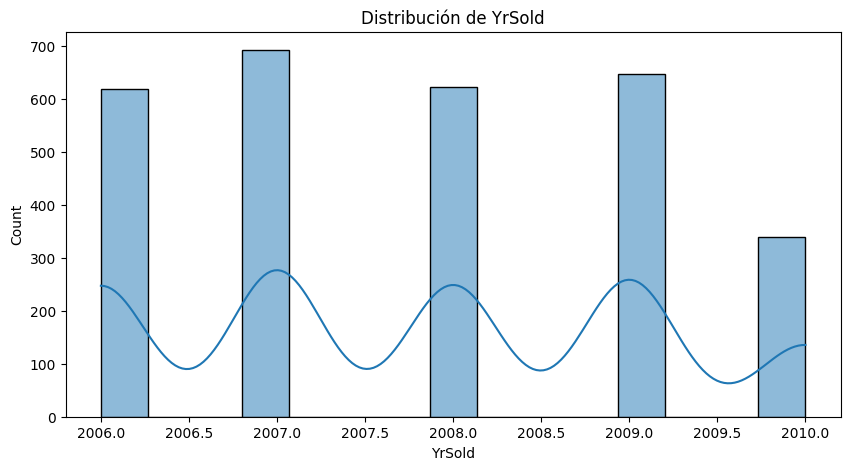

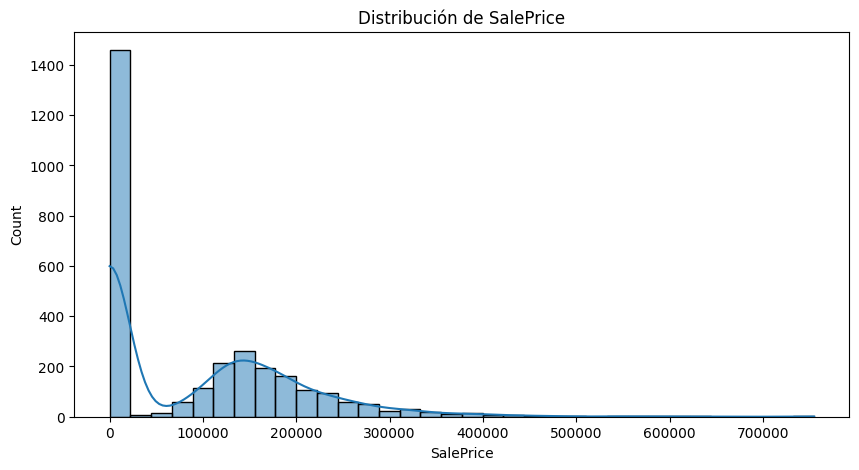

In [494]:
import scipy.stats as stats

numeric_vars = df.select_dtypes(include = ['int64', 'float64'])
skewed_feats = numeric_vars.apply(lambda x: stats.skew(x.dropna()) if np.issubdtype(x.dtype, np.number) else np.nan).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.T

for col in numeric_vars.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(numeric_vars[col].dropna(), kde=True) 
    plt.title('Distribución de ' + col)
    plt.show()

<Axes: >

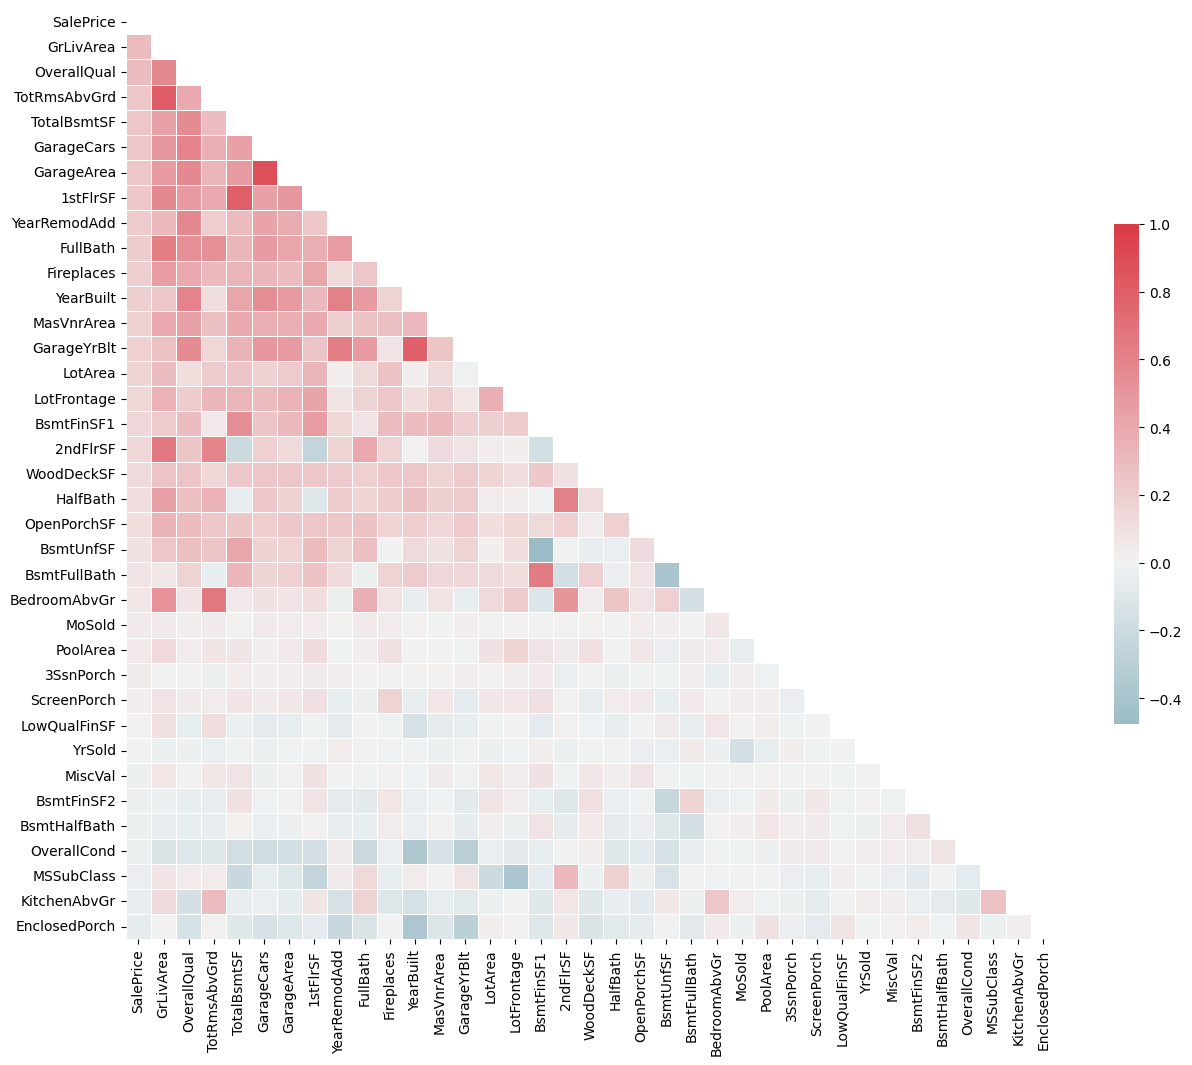

In [495]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Calculate correlation
corr = df[numerical_cols].corr(method = 'pearson').sort_values(by = 'SalePrice', axis = 0, ascending = False).sort_values(by = 'SalePrice', axis = 1, ascending = False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = False)

# Reparar la columna SalePrice

In [496]:
distr('SalePrice')

('la moda es:',
 0    0.0
 Name: SalePrice, dtype: float64,
 'la media es:',
 90491.58821514217,
 'la mediana es:',
 34900.0)

Se cambian los 0s asignados previamente a nan

In [497]:
def replace_zeros_with_nan(df, column):
    df[column] = df[column].replace(0, np.nan)
    return df


In [498]:
replace_zeros_with_nan(df, 'SalePrice')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.000000,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.000000,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.000000,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.000000,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.000000,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,Attchd,1978.113406,Unf,0.0,0.0,TA,TA,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,CarPort,1970.000000,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml,NaN
2916,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,Detchd,1960.000000,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml,NaN
2917,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,Attchd,1978.113406,Unf,0.0,0.0,TA,TA,Y,80,32,0,0,0,0,700,7,2006,WD,Normal,NaN


# buscamos una distribución random normal de (df['SalePrice'].isnull()) valores entre el q1 y q3 para representar los valores faltantes


In [499]:
q1 = df['SalePrice'].quantile(.25)
q3 = df['SalePrice'].quantile(.75)


In [500]:
valores = df['SalePrice']

In [501]:
valores_filtrados = [valor for valor in valores if q1 <= valor <= q3]


In [502]:
valores_filtrados = pd.DataFrame(valores_filtrados)

In [503]:
valores_filtrados_std = valores_filtrados.std()

In [504]:
valores_filtrados_std

0    23345.833972
dtype: float64

In [505]:
df['SalePrice'].count()

1460

In [506]:
muestra = np.random.normal(loc=df['SalePrice'].mean(), scale=valores_filtrados_std,  size=2919)


In [507]:
muestra_serie = pd.Series(muestra)

In [508]:
muestra_serie = muestra_serie.astype(int)

In [509]:
df['SalePrice'] =  df['SalePrice'].fillna(muestra_serie)

In [510]:
df['SalePrice'].isnull().sum()

0

In [511]:
df['SalePrice'].isnull().sum()

0

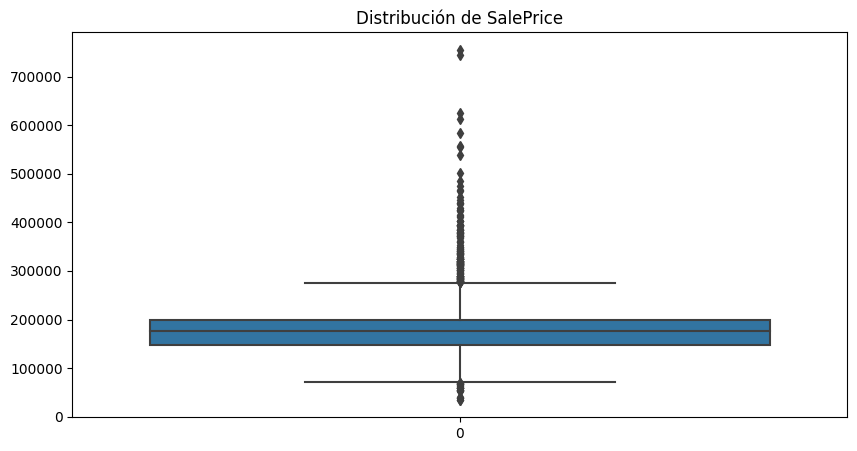

In [512]:
plt.figure(figsize=(10, 5))
sns.boxplot(df['SalePrice']) 
plt.title('Distribución de ' + col)
plt.show()

In [513]:
# Knn simplified

''' from sklearn.impute import KNNImputer
import numpy as np
def impute_with_knn_and_median(data, target_column, k_neighbors=5):
    imputer = KNNImputer(n_neighbors=k_neighbors)
    data_imputed = imputer.fit_transform(data)    
    column_index = data.columns.get_loc(target_column)
    column_median = np.median(data_imputed[:, column_index][data_imputed[:, column_index] != 0])
    data_imputed[:, column_index] = np.where(data_imputed[:, column_index] == 0, column_median, data_imputed[:, column_index])
    data[target_column] = data_imputed[:, column_index]
    return data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = df.copy()
for col in df_encoded.columns[df_encoded.dtypes == 'object']:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
imputed_data = impute_with_knn_and_median(df_encoded, 'SalePrice', k_neighbors=5)
df['SalePrice'] = df_encoded['SalePrice'] '''

" from sklearn.impute import KNNImputer\nimport numpy as np\ndef impute_with_knn_and_median(data, target_column, k_neighbors=5):\n    imputer = KNNImputer(n_neighbors=k_neighbors)\n    data_imputed = imputer.fit_transform(data)    \n    column_index = data.columns.get_loc(target_column)\n    column_median = np.median(data_imputed[:, column_index][data_imputed[:, column_index] != 0])\n    data_imputed[:, column_index] = np.where(data_imputed[:, column_index] == 0, column_median, data_imputed[:, column_index])\n    data[target_column] = data_imputed[:, column_index]\n    return data\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\ndf_encoded = df.copy()\nfor col in df_encoded.columns[df_encoded.dtypes == 'object']:\n    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))\nimputed_data = impute_with_knn_and_median(df_encoded, 'SalePrice', k_neighbors=5)\ndf['SalePrice'] = df_encoded['SalePrice'] "

# Correlación


In [514]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df):
    le = LabelEncoder()
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    for column in categorical_columns:
        df[column] = le.fit_transform(df[column])
    return df

In [515]:
df['MSZoning'].value_counts()

MSZoning
RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [516]:
encode_categorical_columns(df)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,1,2003.000000,1,2.0,548.0,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500.0
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,1,1976.000000,1,2.0,460.0,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500.0
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,1,2001.000000,1,2.0,608.0,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500.0
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,0.0,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,1,2,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,5,1998.000000,2,3.0,642.0,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000.0
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,350.0,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,1,0,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,1,2000.000000,1,3.0,836.0,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,4,21.0,1936,1,3,3,0,4,0,10,2,2,3,5,4,7,1970,1970,1,1,5,5,0.0,3,4,1,3,3,3,5,0.0,5,0.0,546.0,546.0,1,2,1,4,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,6,0,1,1978.113406,2,0.0,0.0,4,4,2,0,0,0,0,0,0,0,6,2006,8,4,169898.0
2915,160,4,21.0,1894,1,3,3,0,4,0,10,2,2,4,5,4,5,1970,1970,1,1,5,5,0.0,3,4,1,3,3,3,4,252.0,5,0.0,294.0,546.0,1,4,1,4,546,546,0,1092,0.0,0.0,1,1,3,1,3,6,6,0,4,1970.000000,2,1.0,286.0,4,4,2,0,24,0,0,0,0,0,4,2006,8,0,160296.0
2916,20,3,160.0,20000,1,3,3,0,4,0,11,2,2,0,2,5,7,1960,1996,1,1,12,13,0.0,3,4,1,3,3,3,0,1224.0,5,0.0,0.0,1224.0,1,0,1,4,1224,0,0,1224,1.0,0.0,1,0,4,1,3,7,6,1,5,1960.000000,2,2.0,576.0,4,4,2,474,0,0,0,0,0,0,9,2006,8,0,175406.0
2917,85,3,62.0,10441,1,3,3,0,4,0,11,2,2,0,6,5,5,1992,1992,1,1,6,15,0.0,3,4,2,2,3,0,2,337.0,5,0.0,575.0,912.0,1,4,1,4,970,0,0,970,0.0,1.0,1,0,3,1,3,6,6,0,1,1978.113406,2,0.0,0.0,4,4,2,80,32,0,0,0,0,700,7,2006,8,4,168613.0


<Axes: >

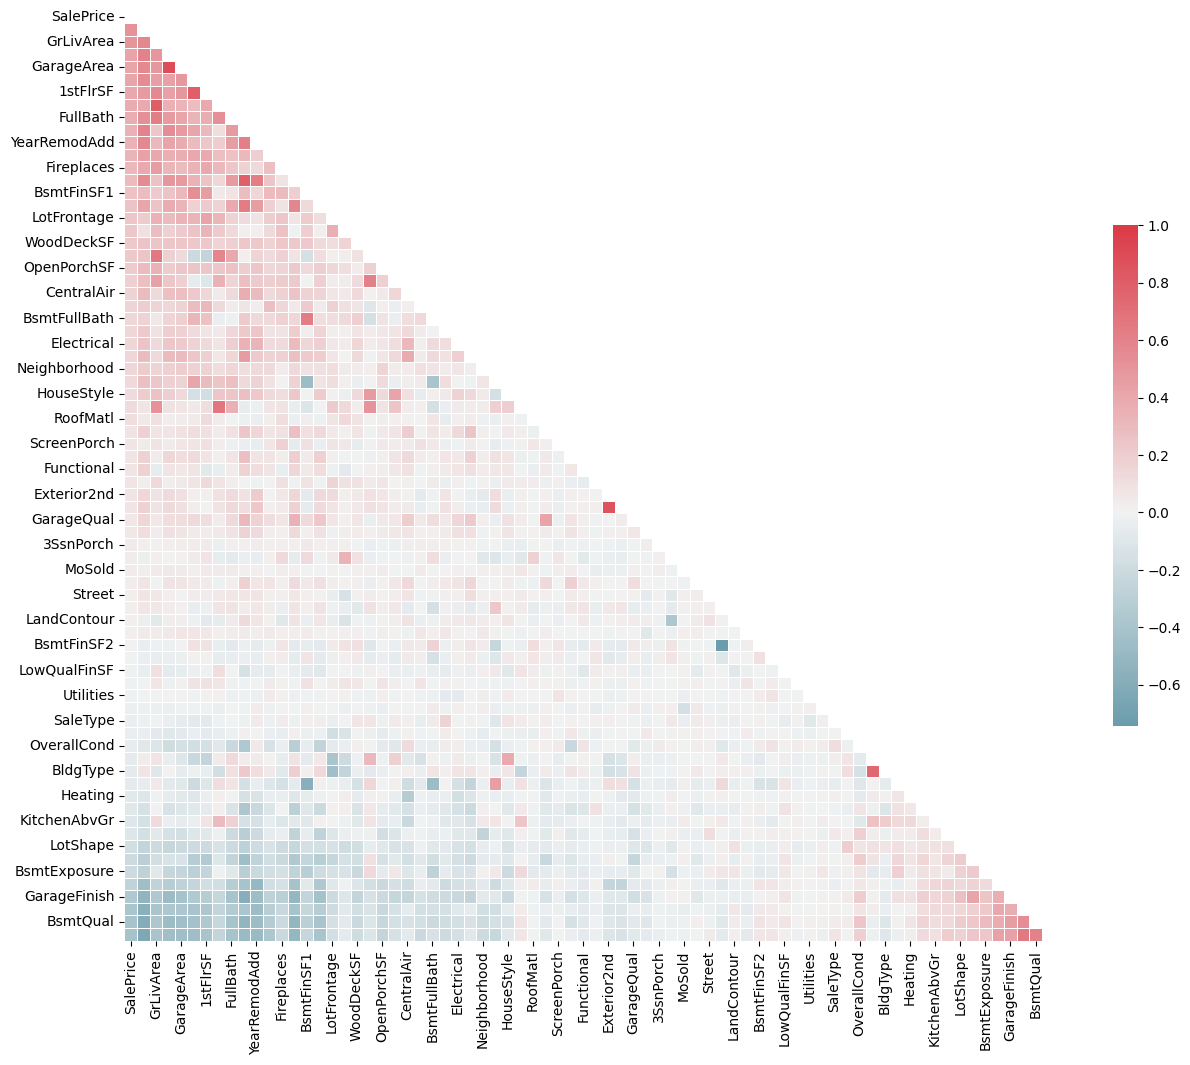

In [517]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Calculate correlation
corr = df[numerical_cols].corr(method = 'pearson').sort_values(by = 'SalePrice', axis = 0, ascending = False).sort_values(by = 'SalePrice', axis = 1, ascending = False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = False)

# Sacar los outliers

In [518]:
def replace_outliers_iqr(df):
    """
    Reemplazamos los outliers del DataFrame usando el método IQR. 
    """
    for columna in df.columns:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR))]
        df[columna] = np.where(df[columna] < (Q1 - 1.5 * IQR), Q1 - 1.5 * IQR, df[columna])
        df[columna] = np.where(df[columna] > (Q3 + 1.5 * IQR), Q3 + 1.5 * IQR, df[columna])
        
    return df


In [519]:
df['SalePrice'].quantile(0.50)

176036.0

In [533]:
df_clean = replace_outliers_iqr(df)

In [535]:
df_clean

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,3.0,65.0,8450.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2003.0,2003.0,1.0,1.0,12.0,13.0,196.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,706.0,5.0,0.0,150.0,856.0,1.0,0.0,1.0,4.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,8.0,6.0,0.0,1.0,2003.000000,1.0,2.0,548.0,4.0,4.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8.0,4.0,208500.0
1,20.0,3.0,80.0,9600.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,2.0,2.0,0.0,2.0,6.0,7.5,1976.0,1976.0,1.0,1.0,8.0,8.0,0.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,978.0,5.0,0.0,284.0,1262.0,1.0,0.0,1.0,4.0,1262.0,0.0,0.0,1262.0,0.0,0.0,2.0,0.0,3.0,1.0,3.0,6.0,6.0,1.0,1.0,1976.000000,1.0,2.0,460.0,4.0,4.0,2.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8.0,4.0,181500.0
2,60.0,3.0,68.0,11250.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2001.0,2002.0,1.0,1.0,12.0,13.0,162.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,486.0,5.0,0.0,434.0,920.0,1.0,0.0,1.0,4.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,6.0,6.0,1.0,1.0,2001.000000,1.0,2.0,608.0,4.0,4.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8.0,4.0,223500.0
3,70.0,3.0,60.0,9550.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,7.0,5.0,1915.0,1970.0,1.0,1.0,13.0,15.0,0.0,3.0,4.0,0.0,3.0,3.0,3.0,0.0,216.0,5.0,0.0,540.0,756.0,1.0,2.0,1.0,4.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,2.0,7.0,6.0,1.0,5.0,1998.000000,2.0,3.0,642.0,4.0,4.0,2.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,2.0,2006.0,8.0,4.0,140000.0
4,60.0,3.0,84.0,14260.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,8.0,5.0,2000.0,2000.0,1.0,1.0,12.0,13.0,350.0,2.0,4.0,2.0,2.0,3.0,0.5,2.0,655.0,5.0,0.0,490.0,1145.0,1.0,0.0,1.0,4.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,2.0,9.0,6.0,1.0,1.0,2000.000000,1.0,3.0,836.0,4.0,4.0,2.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8.0,4.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,145.0,3.0,33.0,1936.0,1.0,3.0,3.0,0.0,4.0,0.0,10.0,2.0,2.0,0.0,5.0,4.0,7.0,1970.0,1970.0,1.0,1.0,5.0,5.0,0.0,3.0,4.0,1.0,3.0,3.0,3.0,5.0,0.0,5.0,0.0,546.0,546.0,1.0,2.0,1.0,4.0,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,3.0,5.0,6.0,0.0,1.0,1978.113406,2.0,0.0,0.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,8.0,4.0,169898.0
2915,145.0,3.0,33.0,1894.0,1.0,3.0,3.0,0.0,4.0,0.0,10.0,2.0,2.0,0.0,5.0,4.0,5.0,1970.0,1970.0,1.0,1.0,5.0,5.0,0.0,3.0,4.0,1.0,3.0,3.0,3.0,4.0,252.0,5.0,0.0,294.0,546.0,1.0,4.0,1.0,4.0,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,3.0,6.0,6.0,0.0,4.0,1970.000000,2.0,1.0,286.0,4.0,4.0,2.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,8.0,4.0,160296.0
2916,20.0,3.0,105.0,17708.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,5.0,7.0,1960.0,1996.0,1.0,1.0,12.0,13.0,0.0,3.0,4.0,1.0,3.0,3.0,3.0,0.0,1224.0,5.0,0.0,0.0,1224.0,1.0,0.0,1.0,4.0,1224.0,0.0,0.0,1224.0,1.0,0.0,1.0,0.0,4.0,1.0,3.0,7.0,6.0,1.0,5.0,1960.000000,2.0,2.0,576.0,4.0,4.0,2.0,420.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0,8.0,4.0,175406.0
2917,85.0,3.0,62.0,10441.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,6.0,5.0,5.0,1992.0,1992.0,1.0,1.0,6.0,15.0,0.0,3.0,4.0,2.0,2.0,3.0,

In [536]:
fig = px.box(df_clean, x='SalePrice')
fig.show()

In [532]:
corr_matrix = df.corr(method='pearson')
high_corr_var = []
threshold = 0.6
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            rowname = corr_matrix.index[j]
            high_corr_var.append((rowname, colname))
for var_pair in high_corr_var:
    print(f"{var_pair[0]} and {var_pair[1]} are highly correlated")

YearBuilt and YearRemodAdd are highly correlated
Exterior1st and Exterior2nd are highly correlated
OverallQual and ExterQual are highly correlated
YearBuilt and Foundation are highly correlated
TotalBsmtSF and 1stFlrSF are highly correlated
2ndFlrSF and GrLivArea are highly correlated
BsmtFinSF1 and BsmtFullBath are highly correlated
GrLivArea and FullBath are highly correlated
2ndFlrSF and HalfBath are highly correlated
ExterQual and KitchenQual are highly correlated
GrLivArea and TotRmsAbvGrd are highly correlated
BedroomAbvGr and TotRmsAbvGrd are highly correlated
YearBuilt and GarageYrBlt are highly correlated
YearRemodAdd and GarageYrBlt are highly correlated
Foundation and GarageYrBlt are highly correlated
OverallQual and GarageCars are highly correlated
GarageCars and GarageArea are highly correlated


<Axes: >

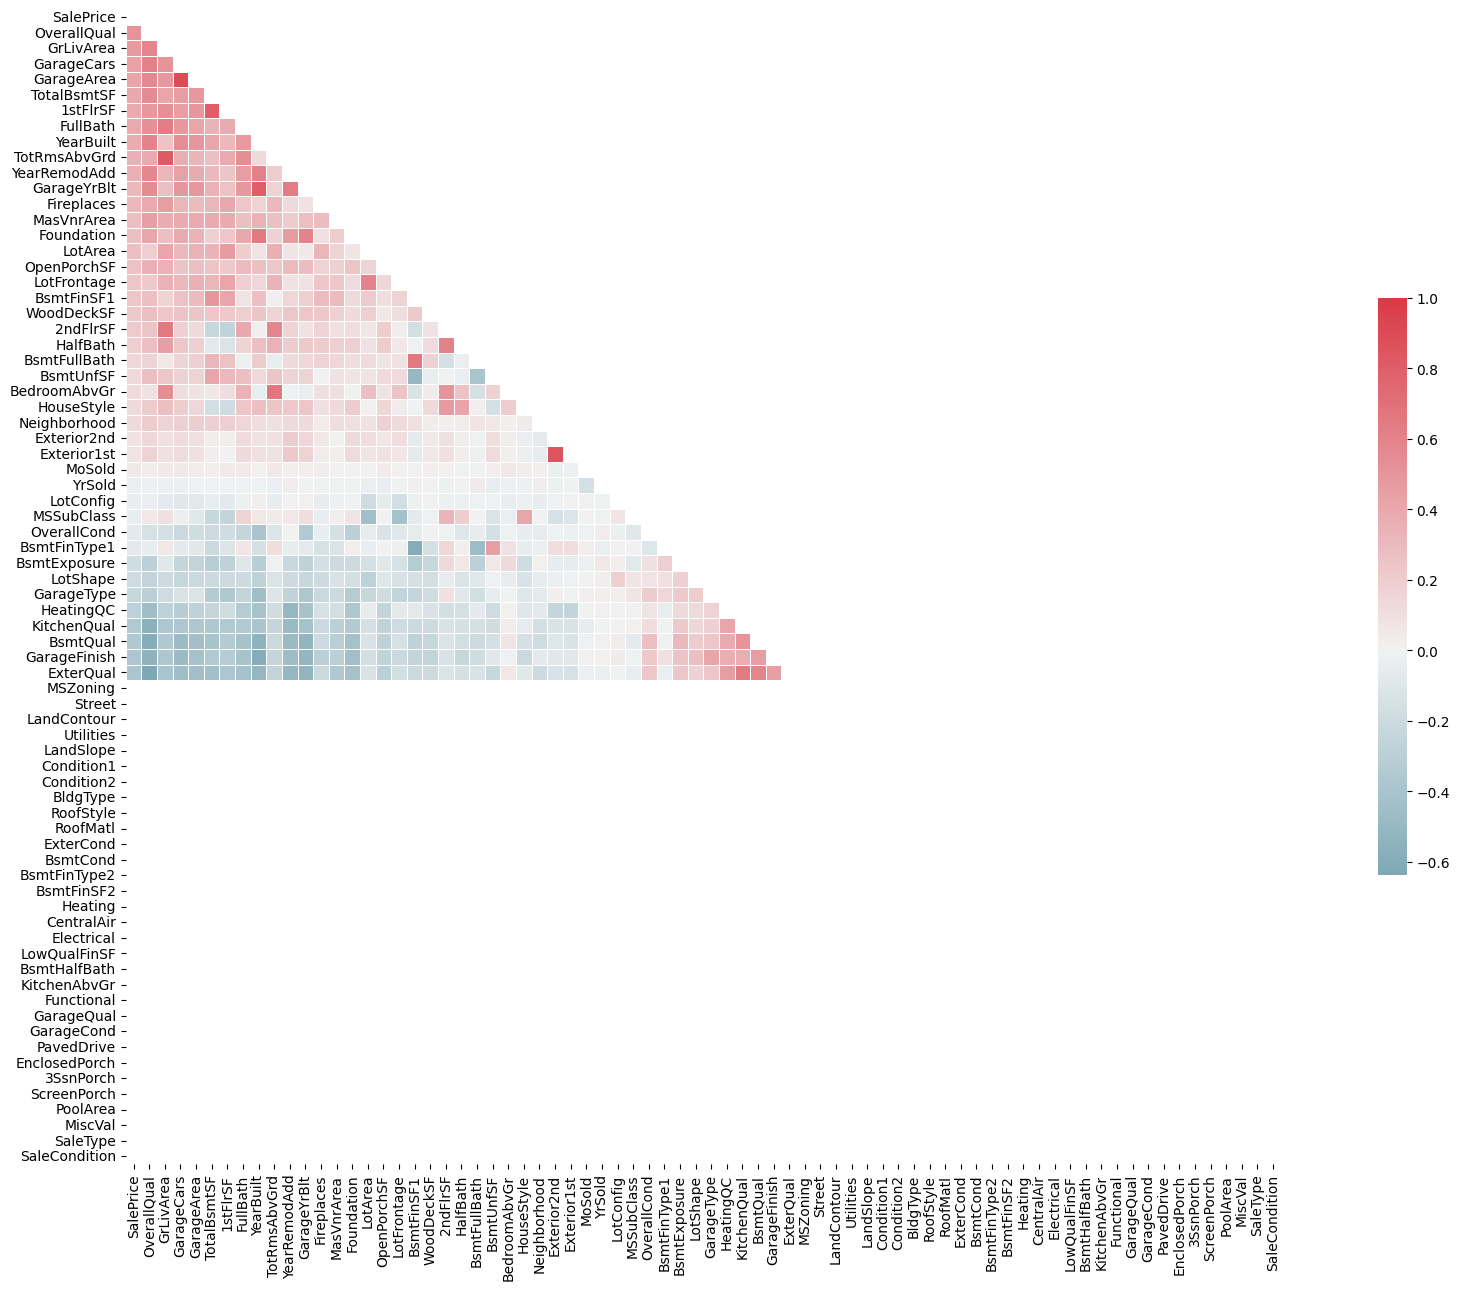

In [523]:
''' # Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns'''

# Calculate correlation
corr = df.corr(method = 'pearson').sort_values(by = 'SalePrice', axis = 0, ascending = False).sort_values(by = 'SalePrice', axis = 1, ascending = False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25,15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = False)

In [530]:
df.corr(method='pearson')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,NaN,-0.427448,-0.436767,NaN,0.073020,NaN,NaN,0.072519,NaN,-0.000999,NaN,NaN,NaN,0.414588,0.062986,-0.082943,0.060456,0.063936,NaN,NaN,-0.108332,-0.140927,0.017492,-0.039486,NaN,0.072078,-0.067335,NaN,-0.076359,0.004381,-0.069368,NaN,NaN,-0.118655,-0.224852,NaN,1.351004e-03,NaN,NaN,-0.253427,0.331209,NaN,0.096565,0.003313,NaN,0.160057,0.201691,-0.032942,NaN,0.009527,0.045755,NaN,-0.039675,0.078134,0.104935,-0.012176,-0.026000,-0.089235,NaN,NaN,NaN,-0.012945,-0.004955,NaN,NaN,NaN,NaN,NaN,0.005503,-0.013882,NaN,NaN,-0.043070
MSZoning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,-0.427448,NaN,1.000000,0.598036,NaN,-0.135561,NaN,NaN,-0.174650,NaN,0.128312,NaN,NaN,NaN,0.034257,0.221801,-0.082930,0.143254,0.089591,NaN,NaN,0.068952,0.108107,0.229480,-0.172482,NaN,0.121446,-0.145679,NaN,-0.144150,-0.020788,0.171574,NaN,NaN,0.120355,0.324785,NaN,-7.782145e-02,NaN,NaN,0.415850,0.029843,NaN,0.342911,0.089203,NaN,0.183498,0.052952,0.255053,NaN,-0.184993,0.338772,NaN,0.237290,-0.260823,0.090806,-0.214684,0.318011,0.353793,NaN,NaN,NaN,0.115186,0.151062,NaN,NaN,NaN,NaN,NaN,0.009898,0.000016,NaN,NaN,0.240137
LotArea,-0.436767,NaN,0.598036,1.000000,NaN,-0.283748,NaN,NaN,-0.184663,NaN,0.085786,NaN,NaN,NaN,0.008488,0.192220,-0.057244,0.082736,0.073401,NaN,NaN,0.074170,0.105987,0.168212,-0.126960,NaN,0.073865,-0.130612,NaN,-0.163864,-0.040225,0.212772,NaN,NaN,0.079017,0.340620,NaN,-6.239470e-02,NaN,NaN,0.462563,0.068388,NaN,0.409963,0.120192,NaN,0.203716,0.086866,0.266987,NaN,-0.150313,0.366062,NaN,0.326453,-0.229668,0.049226,-0.172679,0.312851,0.350865,NaN,NaN,NaN,0.189689,0.157104,NaN,NaN,NaN,NaN,NaN,0.001760,-0.033324,NaN,NaN,0.278612
Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.005503,NaN,0.009898,0.001760,NaN,0.006591,NaN,NaN,0.009069,NaN,0.014261,NaN,NaN,NaN,0.028071,0.029257,-0.007411,0.014074,0.017693,NaN,NaN,-0.022713,-0.026091,0.007359,-0.019235,NaN,-0.003793,-0.012580,NaN,-0.019556,0.016208,0.002975,NaN,NaN,0.022459,0.022772,NaN,7.941713e-07,NaN,NaN,0.044354,0.014124,NaN,0.047682,-0.002802,NaN,0.045683,-0.001136,0.053552,NaN,-0.044983,0.047988,NaN,0.032779,0.015330,0.021436,0.011913,0.048958,0.039695,NaN,NaN,NaN,0.016111,0.036083,NaN,NaN,NaN,NaN,NaN,1.000000,-0.153895,NaN,NaN,0.047756
YrSold,-0.013882,NaN,0.000016,-0.033324,NaN,0.029818,NaN,NaN,-0.005720,NaN,0.030902,NaN,NaN,NaN,-0.019323,-0.019893,0.035486,-0.012221,0.

In [525]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,3.0,65.0,8450.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2003.0,2003.0,1.0,1.0,12.0,13.0,196.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,706.0,5.0,0.0,150.0,856.0,1.0,0.0,1.0,4.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,8.0,6.0,0.0,1.0,2003.000000,1.0,2.0,548.0,4.0,4.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8.0,4.0,208500.0
1,20.0,3.0,80.0,9600.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,2.0,2.0,0.0,2.0,6.0,7.5,1976.0,1976.0,1.0,1.0,8.0,8.0,0.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,978.0,5.0,0.0,284.0,1262.0,1.0,0.0,1.0,4.0,1262.0,0.0,0.0,1262.0,0.0,0.0,2.0,0.0,3.0,1.0,3.0,6.0,6.0,1.0,1.0,1976.000000,1.0,2.0,460.0,4.0,4.0,2.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8.0,4.0,181500.0
2,60.0,3.0,68.0,11250.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,2001.0,2002.0,1.0,1.0,12.0,13.0,162.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,486.0,5.0,0.0,434.0,920.0,1.0,0.0,1.0,4.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,6.0,6.0,1.0,1.0,2001.000000,1.0,2.0,608.0,4.0,4.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8.0,4.0,223500.0
3,70.0,3.0,60.0,9550.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,7.0,5.0,1915.0,1970.0,1.0,1.0,13.0,15.0,0.0,3.0,4.0,0.0,3.0,3.0,3.0,0.0,216.0,5.0,0.0,540.0,756.0,1.0,2.0,1.0,4.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,2.0,7.0,6.0,1.0,5.0,1998.000000,2.0,3.0,642.0,4.0,4.0,2.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,2.0,2006.0,8.0,4.0,140000.0
4,60.0,3.0,84.0,14260.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,8.0,5.0,2000.0,2000.0,1.0,1.0,12.0,13.0,350.0,2.0,4.0,2.0,2.0,3.0,0.5,2.0,655.0,5.0,0.0,490.0,1145.0,1.0,0.0,1.0,4.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,2.0,9.0,6.0,1.0,1.0,2000.000000,1.0,3.0,836.0,4.0,4.0,2.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8.0,4.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,145.0,3.0,33.0,1936.0,1.0,3.0,3.0,0.0,4.0,0.0,10.0,2.0,2.0,0.0,5.0,4.0,7.0,1970.0,1970.0,1.0,1.0,5.0,5.0,0.0,3.0,4.0,1.0,3.0,3.0,3.0,5.0,0.0,5.0,0.0,546.0,546.0,1.0,2.0,1.0,4.0,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,3.0,5.0,6.0,0.0,1.0,1978.113406,2.0,0.0,0.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,8.0,4.0,169898.0
2915,145.0,3.0,33.0,1894.0,1.0,3.0,3.0,0.0,4.0,0.0,10.0,2.0,2.0,0.0,5.0,4.0,5.0,1970.0,1970.0,1.0,1.0,5.0,5.0,0.0,3.0,4.0,1.0,3.0,3.0,3.0,4.0,252.0,5.0,0.0,294.0,546.0,1.0,4.0,1.0,4.0,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,3.0,6.0,6.0,0.0,4.0,1970.000000,2.0,1.0,286.0,4.0,4.0,2.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,8.0,4.0,160296.0
2916,20.0,3.0,105.0,17708.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,5.0,7.0,1960.0,1996.0,1.0,1.0,12.0,13.0,0.0,3.0,4.0,1.0,3.0,3.0,3.0,0.0,1224.0,5.0,0.0,0.0,1224.0,1.0,0.0,1.0,4.0,1224.0,0.0,0.0,1224.0,1.0,0.0,1.0,0.0,4.0,1.0,3.0,7.0,6.0,1.0,5.0,1960.000000,2.0,2.0,576.0,4.0,4.0,2.0,420.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0,8.0,4.0,175406.0
2917,85.0,3.0,62.0,10441.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,6.0,5.0,5.0,1992.0,1992.0,1.0,1.0,6.0,15.0,0.0,3.0,4.0,2.0,2.0,3.0,

<Axes: >

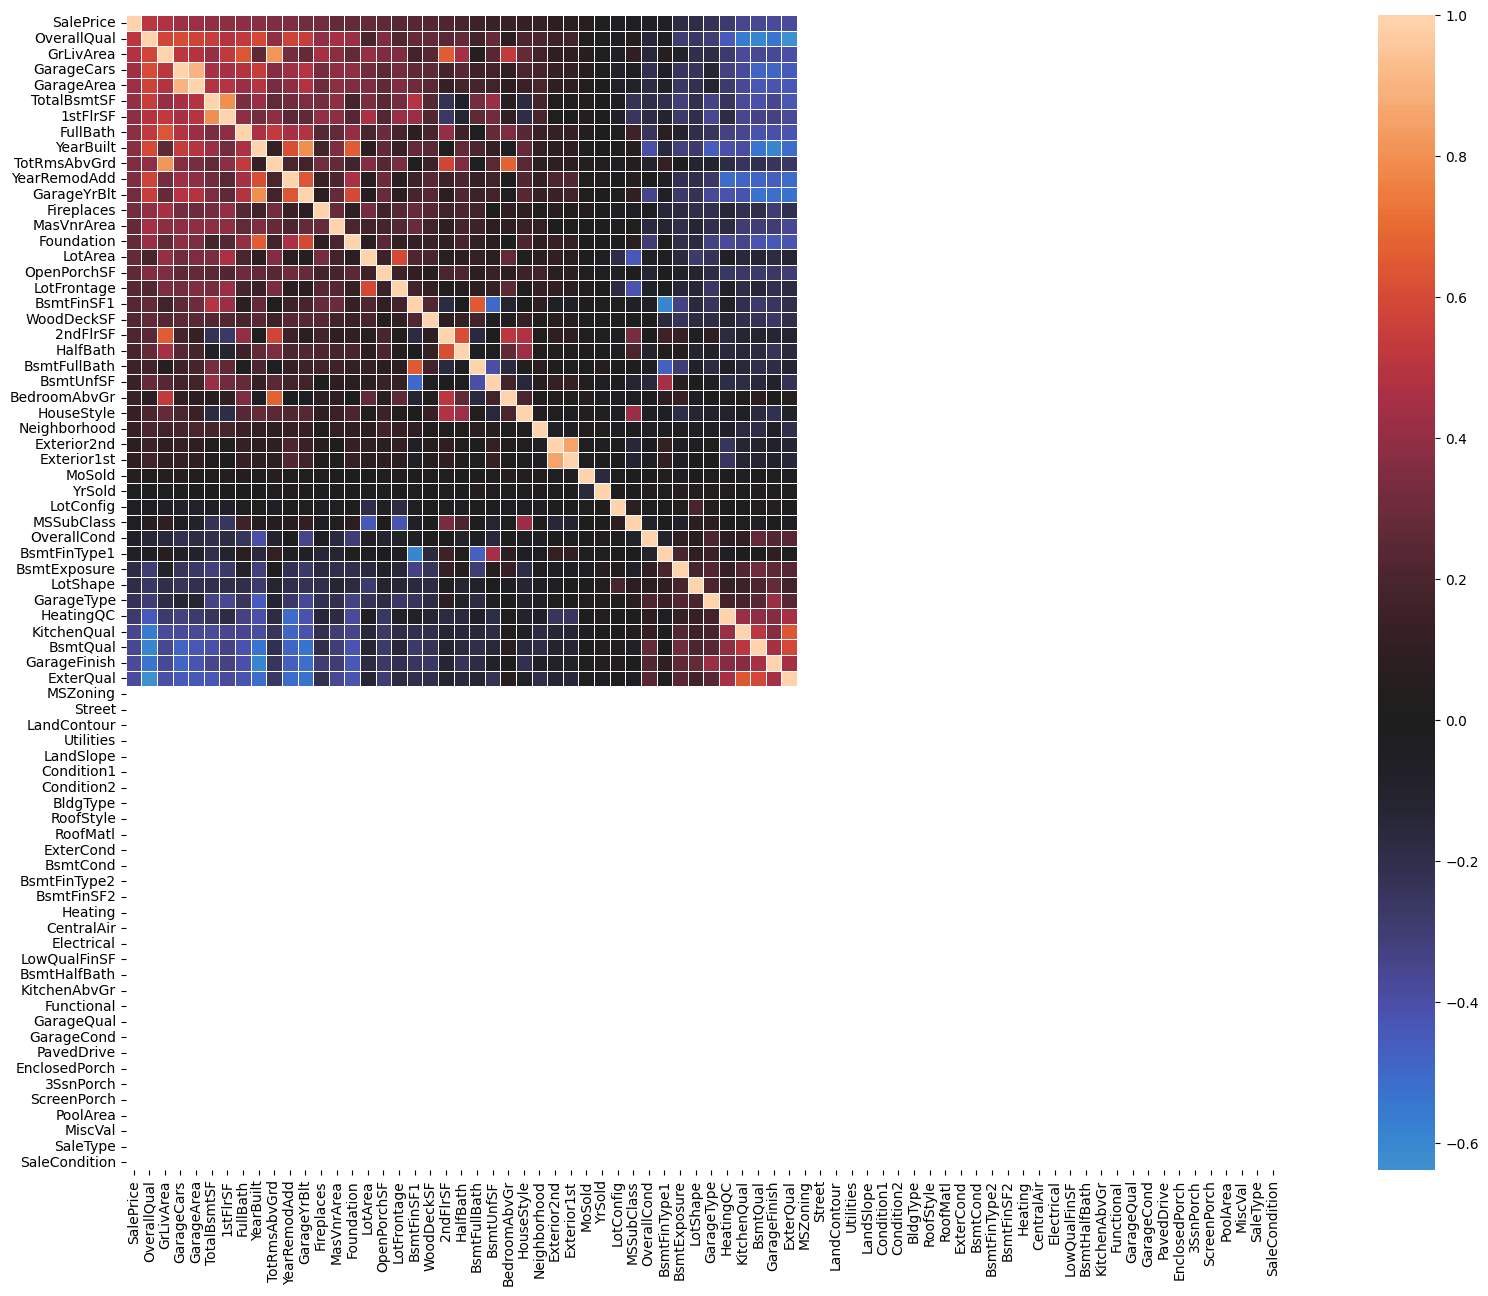

In [531]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Calculate correlation
corr = df.corr(method = 'pearson').sort_values(by = 'SalePrice', axis = 0, ascending = False).sort_values(by = 'SalePrice', axis = 1, ascending = False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25,15))

sns.heatmap(corr,vmax=1, center=0,
            square=True, linewidths=.5, annot = False)

In [537]:
# Guardamos el CSV
df_clean.to_csv('df_limpio.csv', header=True, index=False) 